In [1]:
import numpy as np, libstempo as LT, json, libstempo.toasim as LTT, libstempo.plot as LP
import astroabc
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline

# 1. Define the data here

parpath = "../NANOGrav-DWG/11yr_stochastic_analysis/nano11y_data/partim/B1855+09_NANOGrav_11yv0.gls.par"
timpath = "../NANOGrav-DWG/11yr_stochastic_analysis/nano11y_data/partim/B1855+09_NANOGrav_11yv0.tim"

psr = LT.tempopulsar(parfile = parpath, timfile = timpath)

data = psr.toas()

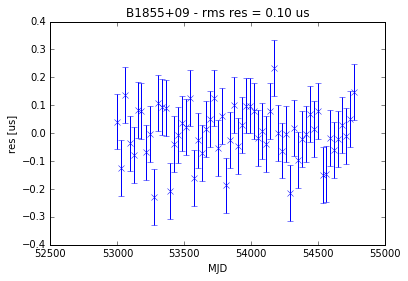

In [2]:
parfile = '../NANOGrav-DWG/11yr_stochastic_analysis/nano11y_data/partim/B1855+09_NANOGrav_11yv0.gls.par'

epochs = np.arange(53000,54800,30)+np.random.randn(60)  # observe every 30+-1 days

psr = LTT.fakepulsar(parfile=parfile,
                    obstimes=epochs,
                    toaerr=0.1)

LTT.add_efac(psr,efac=1.0,seed=1234)
LP.plotres(psr)

data = psr.toas()

# 2. Define the simulation here

def simulation(params):
    
    #params should be: par_file, efac
    psr_copy = psr
    
    LTT.make_ideal(psr_copy)
    
    #add white noise:
    LTT.add_efac(psr_copy, efac = params[1])
    LTT.add_equad(psr_copy, equad = params[2])
    LTT.add_jitter(psr_copy, ecorr = params[3])
    
    #add red noise, to be varied later
    LTT.add_rednoise(psr_copy, params[4], params[5])
    
    return psr_copy.toas()

In [3]:
def simulation(params):
    
    #params should be: par_file, epochs, efac
    psr_copy = LTT.fakepulsar(parfile = parfile,
                    obstimes=epochs,  # observe every 30+-1 days
                    toaerr=0.1)
    
    #add white noise:
    LTT.add_efac(psr_copy, efac = params[0])
    #LTT.add_equad(psr_copy, equad = params[2])
    #LTT.add_jitter(psr_copy, ecorr = params[3])
    
    #add red noise, to be varied later
    #LTT.add_rednoise(psr_copy, params[4], params[5])
    
    return psr_copy.toas()

In [4]:
def dist_metric(d, x):
    return np.sum(np.abs(d - x))

In [5]:
sim_data = simulation([1.0])

distance = dist_metric(data, sim_data)

print distance

7.240075206027540844e-11


In [6]:
#Define the prior on efac
priors = [('uniform', [0.0, 5.0])]

In [7]:
#Set the keywords for astroABC
prop = {'dfunc': dist_metric, 'outfile': "simplest_example.txt", 'verbose': 1, 'adapt_t': True, 
        'variance_method': 4}

In [8]:
sampler = astroabc.ABC_class(1, 20, data, [1e-10, 1e-12], 30, priors, **prop)

	 	
	 ########################     astroABC     ########################	
	 	
	 Npart=20 	 numt=30 	 tol=[0.0000,0.0000] exp
	 Priors= [('uniform', [0.0, 5.0])]


In [ ]:
model_sim = simulation

sampler.sample(model_sim)